In [34]:
# visuaiize the data
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# 分辨率
plt.rcParams['figure.dpi'] = 300

data_dir = '../data'
data = pd.read_csv(os.path.join(data_dir, 'SSE.csv'))
data.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20100104,3243.760,3289.750,3295.279,3243.319,3277.139,-33.379,-1.0185,109447927.0,1.337735e+08
1,000001.SH,20100105,3282.179,3254.468,3290.512,3221.462,3243.760,38.419,1.1844,126115066.0,1.618582e+08
2,000001.SH,20100106,3254.215,3277.517,3295.868,3253.044,3282.179,-27.964,-0.8520,123651384.0,1.580401e+08
3,000001.SH,20100107,3192.776,3253.991,3268.819,3176.707,3254.215,-61.439,-1.8880,128652827.0,1.572296e+08
4,000001.SH,20100108,3195.997,3177.259,3198.920,3149.017,3192.776,3.221,0.1009,98377147.0,1.217399e+08


In [36]:
# date time index
data['date_time'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data = data.set_index('date_time')
data.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
date_time,,,,,,,,,,,
2010-01-04,000001.SH,20100104,3243.760,3289.750,3295.279,3243.319,3277.139,-33.379,-1.0185,109447927.0,1.337735e+08
2010-01-05,000001.SH,20100105,3282.179,3254.468,3290.512,3221.462,3243.760,38.419,1.1844,126115066.0,1.618582e+08
2010-01-06,000001.SH,20100106,3254.215,3277.517,3295.868,3253.044,3282.179,-27.964,-0.8520,123651384.0,1.580401e+08
2010-01-07,000001.SH,20100107,3192.776,3253.991,3268.819,3176.707,3254.215,-61.439,-1.8880,128652827.0,1.572296e+08
2010-01-08,000001.SH,20100108,3195.997,3177.259,3198.920,3149.017,3192.776,3.221,0.1009,98377147.0,1.217399e+08


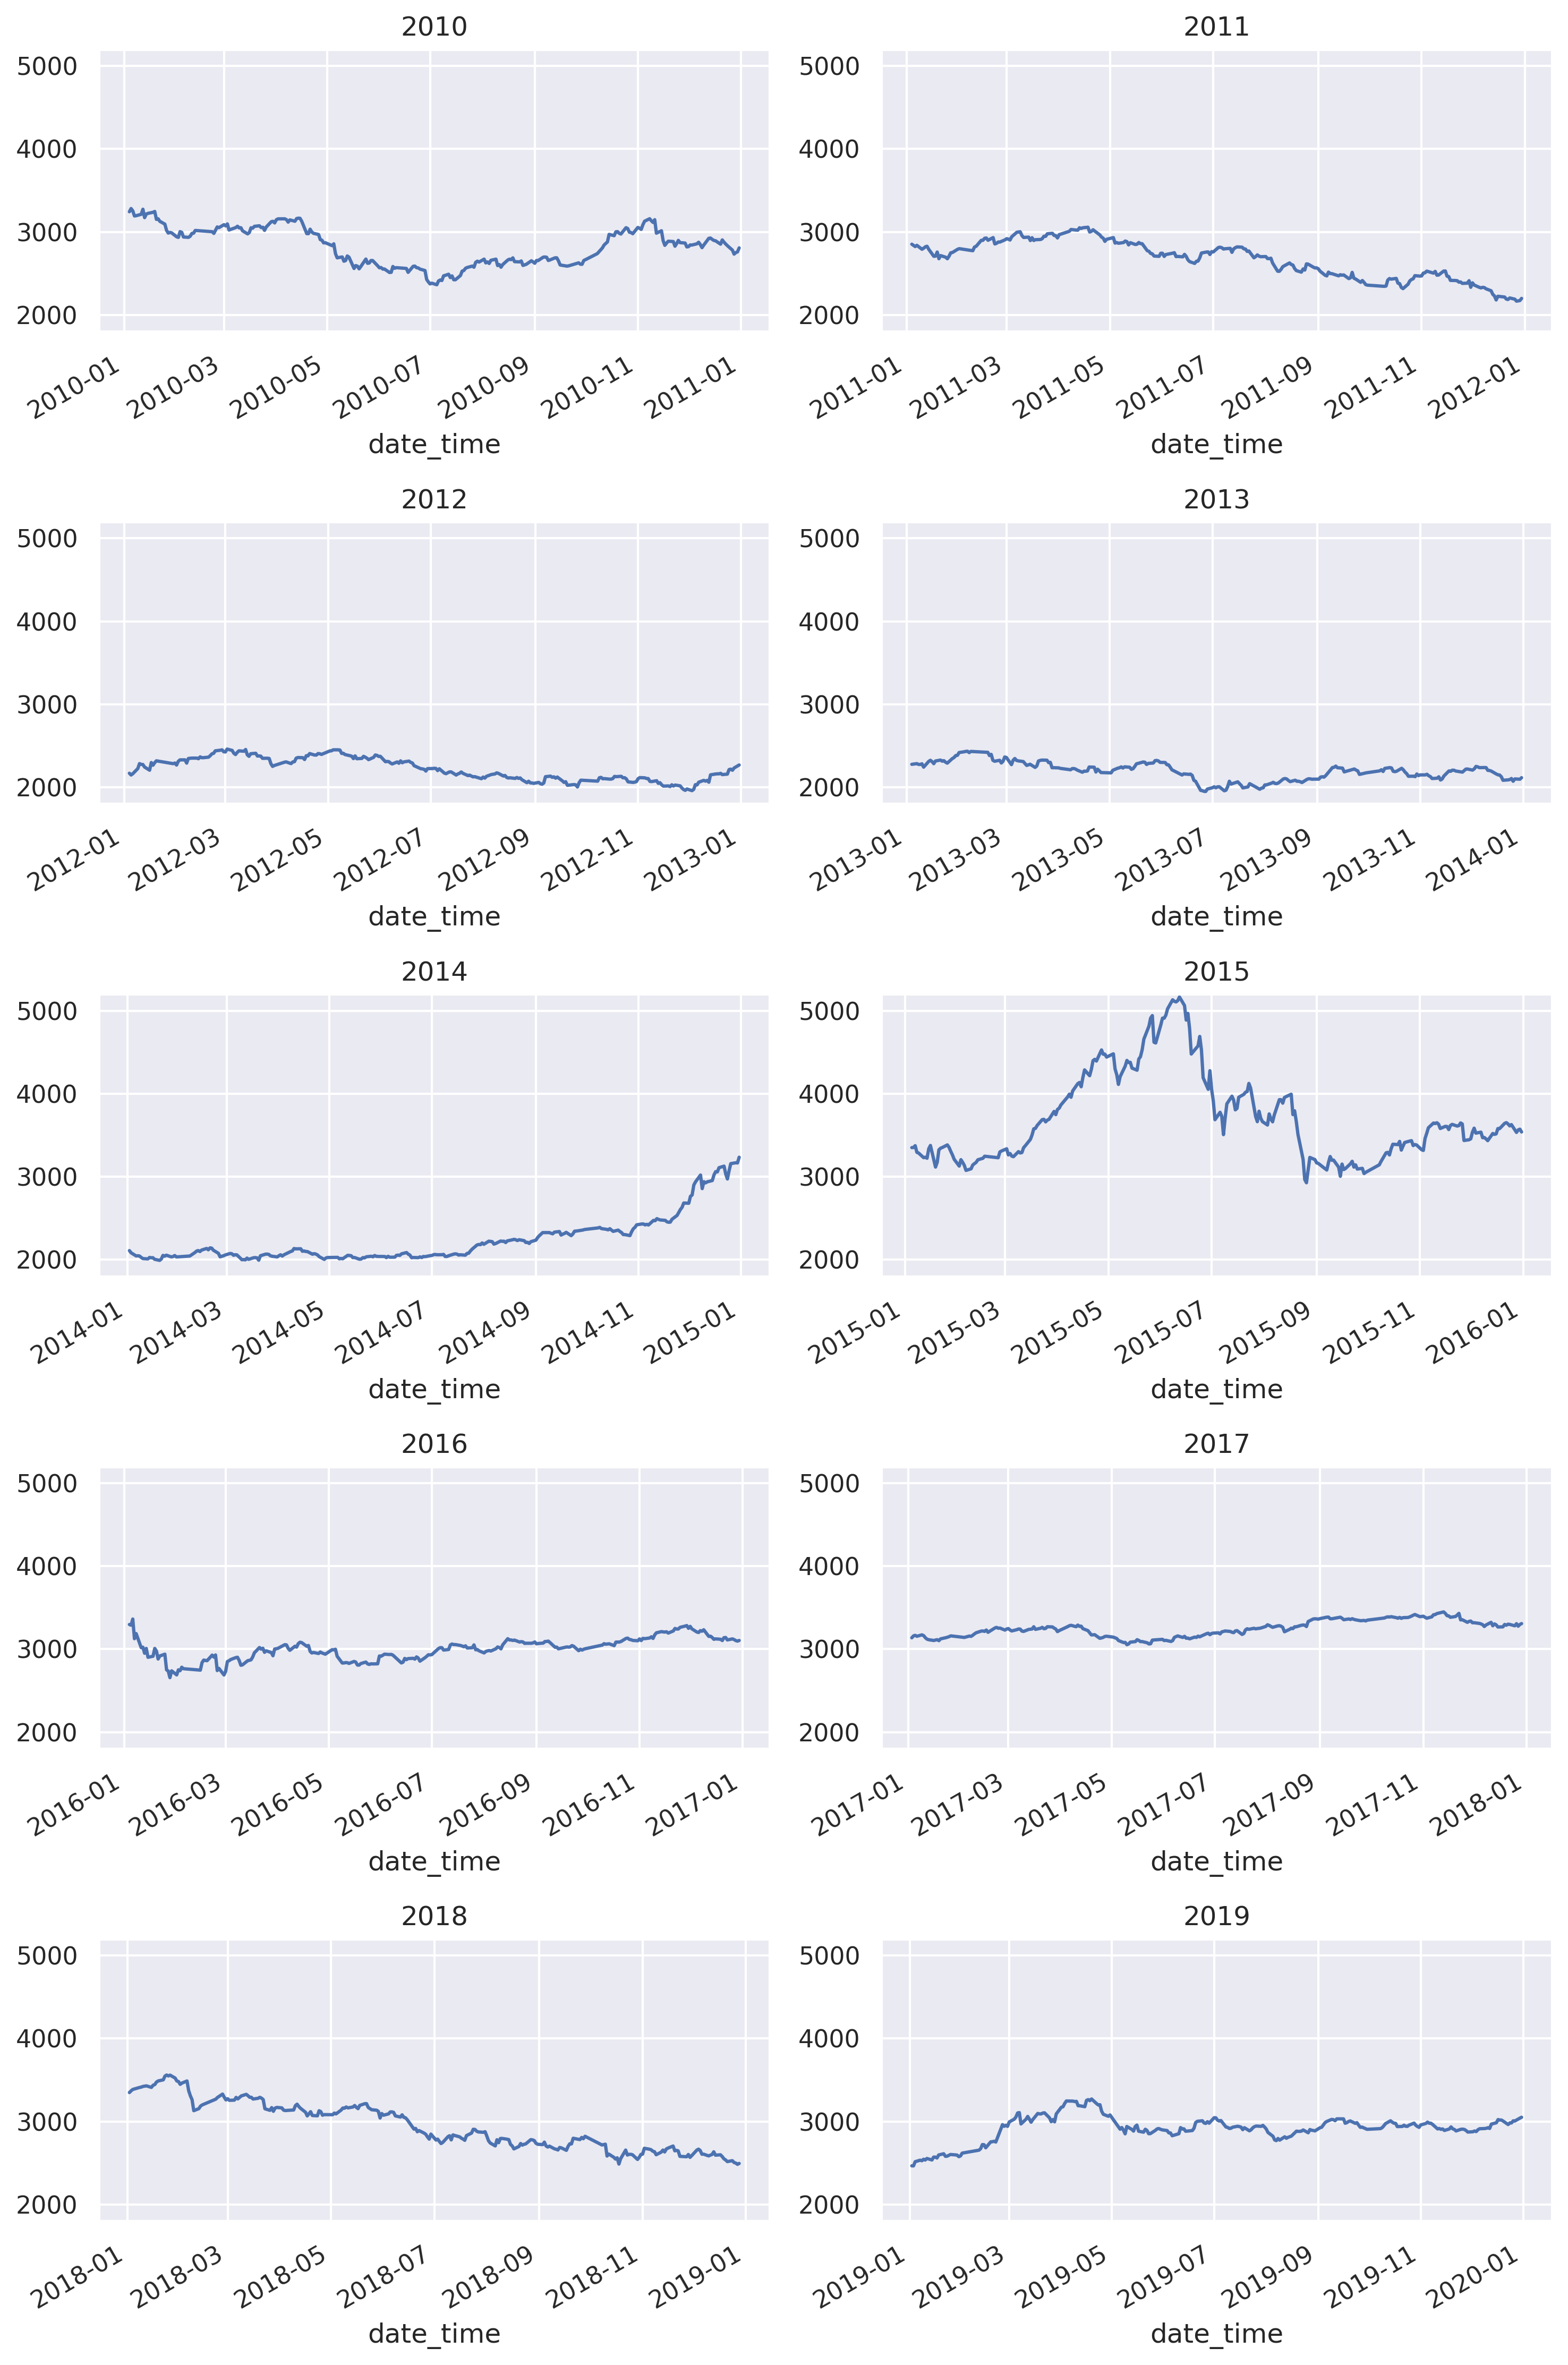

In [51]:
# trend yearly
data['year'] = data.index.year

# plot for each year using subplots(5,2). close bound [2000, 6000]
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for i, year in enumerate(data['year'].unique()):
    ax = axes[i//2, i%2]
    data[data['year']==year]['close'].plot(ax=ax)
    ax.set_title(year)
    ax.set_ylim([1800, 5200])
plt.tight_layout()
plt.show()
# save
fig.savefig(os.path.join(data_dir, 'SSE_yearly_trend.png'))

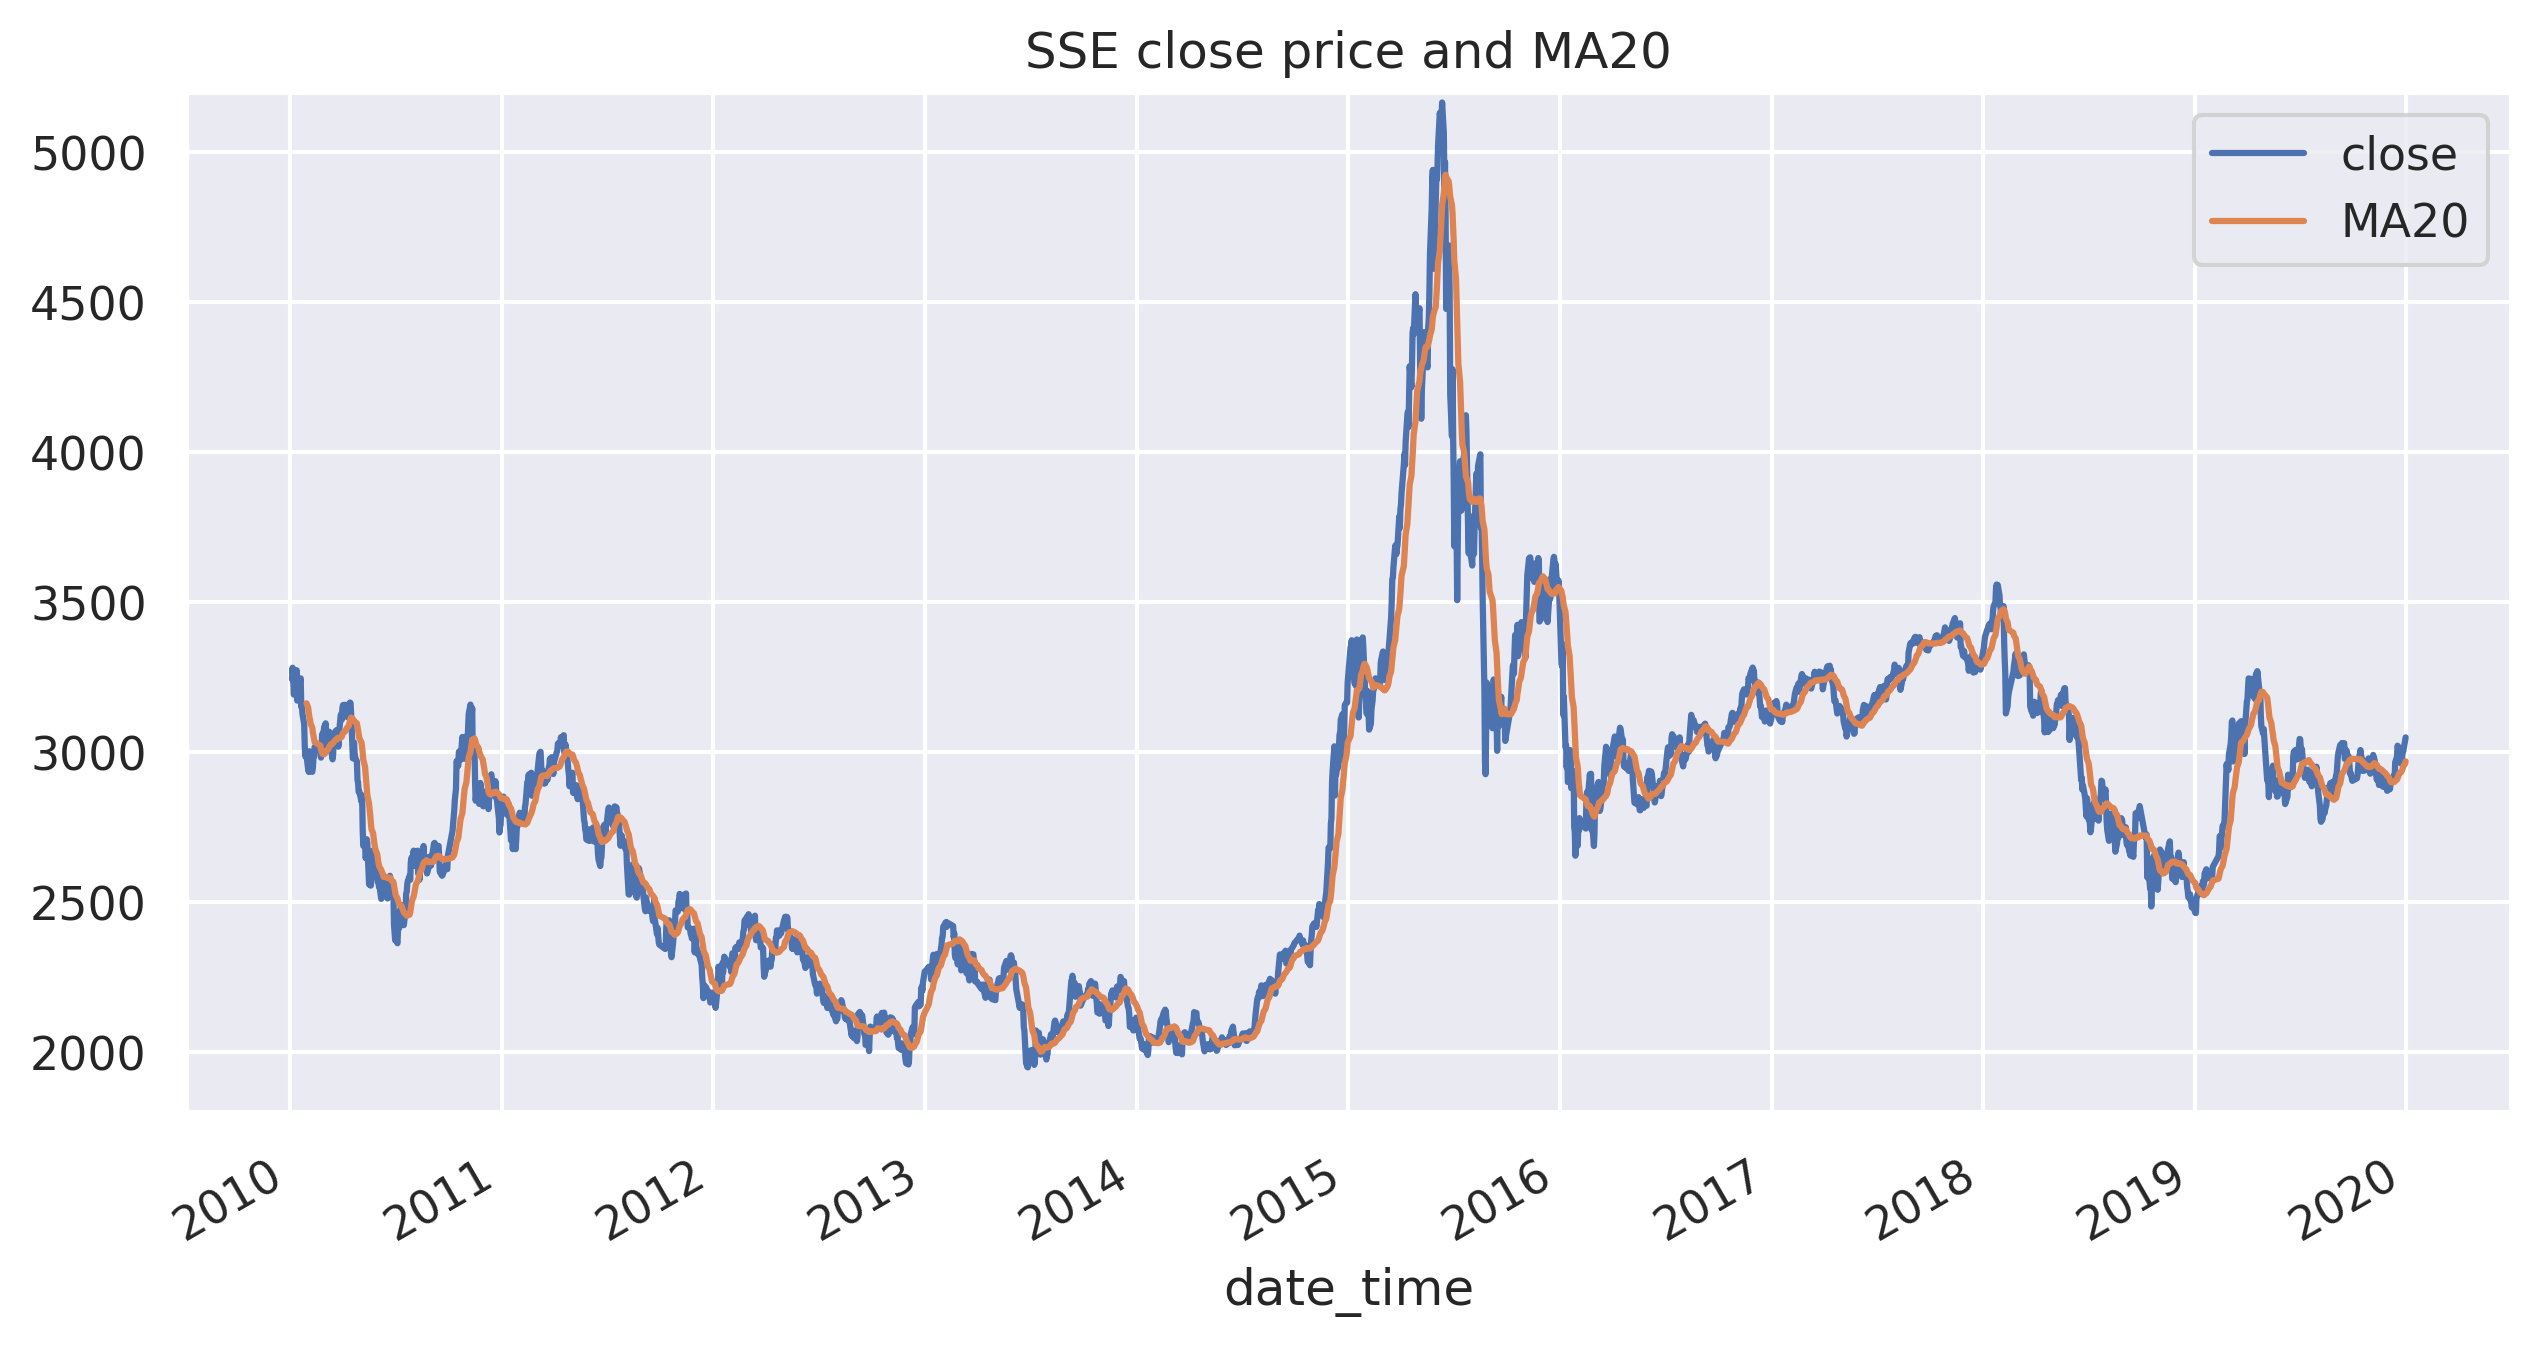

In [52]:
# MA20
data['MA20'] = data['close'].rolling(20).mean()

# plot
fig, ax = plt.subplots(figsize=(10, 5))
data['close'].plot(ax=ax, label='close')
data['MA20'].plot(ax=ax, label='MA20')
ax.set_title('SSE close price and MA20')
ax.set_ylim([1800, 5200])
ax.legend()
plt.show()
# save
# fig.savefig(os.path.join(data_dir, 'SSE_close_MA20.png'))

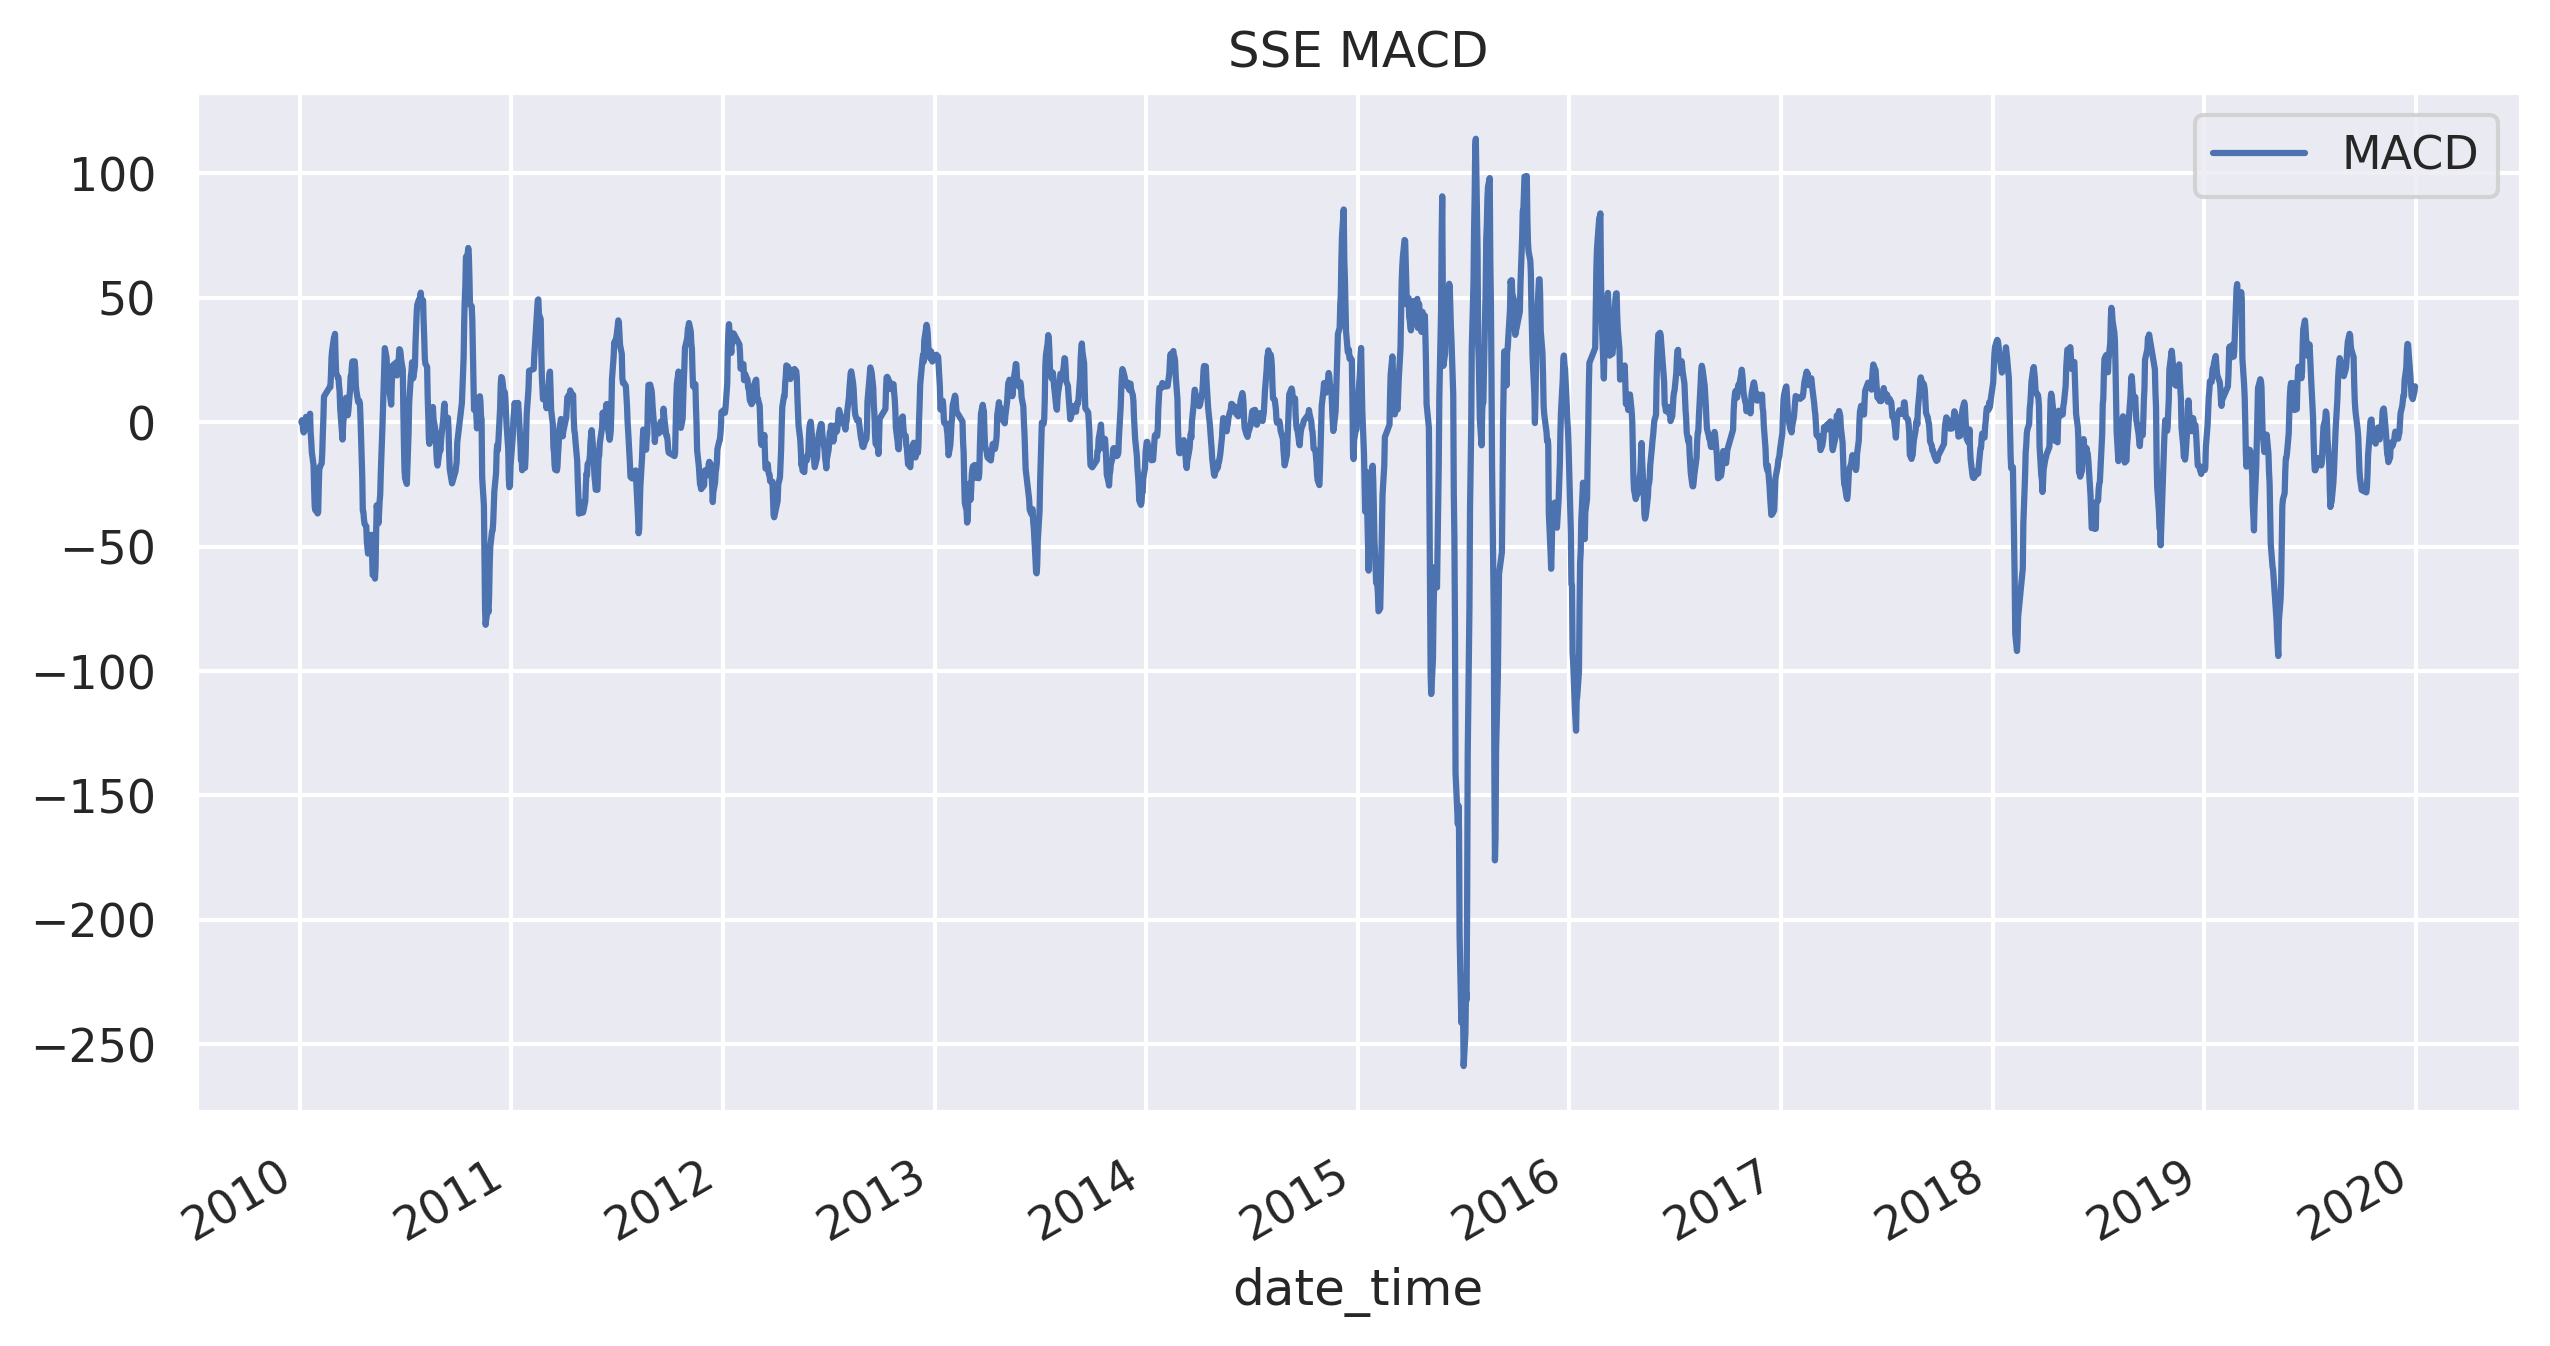

In [54]:
# technial indicators
# MACD
data['EMA12'] = data['close'].ewm(span=12).mean()
data['EMA26'] = data['close'].ewm(span=26).mean()
data['DIF'] = data['EMA12'] - data['EMA26']
data['DEA'] = data['DIF'].ewm(span=9).mean()
data['MACD'] = 2 * (data['DIF'] - data['DEA'])

# plot
fig, ax = plt.subplots(figsize=(10, 5))
data['MACD'].plot(ax=ax, label='MACD')
ax.set_title('SSE MACD')
ax.legend()
plt.show()

# save
fig.savefig(os.path.join(data_dir, 'SSE_MACD.png'))
